### Intro
This notebook generates histograms and a correlation matrix for the titanic dataset

### Load in the packages

In [54]:
import pandas as pd
import numpy as np
from  matplotlib import pyplot as plt
import seaborn as sns

### Load in cleaned training

In [3]:
file_path = 'https://raw.githubusercontent.com/Puxeng/NeuralTitanic/main/clean_train.csv'
tbl_train_clean = pd.read_csv(file_path)
tbl_train_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1047 non-null   int64  
 1   Age         1047 non-null   float64
 2   Fare        1047 non-null   float64
 3   Sex         1047 non-null   int64  
 4   2urvived    1047 non-null   int64  
 5   sibsp_0     1047 non-null   float64
 6   sibsp_1     1047 non-null   float64
 7   sibsp_2     1047 non-null   float64
 8   sibsp_3     1047 non-null   float64
 9   sibsp_4     1047 non-null   float64
 10  sibsp_5     1047 non-null   float64
 11  sibsp_6     1047 non-null   float64
 12  Parch_0     1047 non-null   float64
 13  Parch_1     1047 non-null   float64
 14  Parch_2     1047 non-null   float64
 15  Parch_3     1047 non-null   float64
 16  Parch_4     1047 non-null   float64
 17  Parch_5     1047 non-null   float64
 18  Parch_6     1047 non-null   float64
 19  Parch_7     1047 non-null  

### Data Dictionary

Source => https://www.kaggle.com/competitions/titanic/data


[Age] => Age in years (I assume this is measured at the time when the passenger got onto the ship)

[Fare] => Passenger fare (Is there a way to validate this)

[Sex] => Gender (Male is 0, Female is 1)

[2survived] => (This probably is the survided flag) survival

[sibsp_xx] => This is a one-hot encoded version of sibsp. What were the bandings here ?

[parch_xx] => This is a one-hot encoded version of parch_xx. What were the bandings here ?

[Ticket] => Hmm, wonder if this could be used to identify passengers ?

[Pclass_xx] => Banded version of class






### Convert the encoded fields into a singular column

* sibsp_i into sibsp_Categorical
* Parch_i into Parch_Categorical
* Pclass_i into Pclass_Categorical
* Embarked_i into Embarked_Categorical

I am not sure what the "i" in each field means. I assume for "sibsp_" and "Parch_" that the "i" is the number of siblings or parent/children

In [42]:
prefixList = ['sibsp_','Parch_','Pclass_','Embarked_']

for prefix in prefixList:
  columnList = [columnName for columnName in tbl_train_clean.columns if prefix in columnName and 'Categorical' not in columnName]
  df_temp    = tbl_train_clean[columnList]
  tbl_train_clean[prefix+'Categorical'] = df_temp.idxmax(1).str.replace(prefix,'').astype(float)


### Check null values

In [43]:
tbl_train_clean.isna().sum()

Unnamed: 0              0
Age                     0
Fare                    0
Sex                     0
2urvived                0
sibsp_0                 0
sibsp_1                 0
sibsp_2                 0
sibsp_3                 0
sibsp_4                 0
sibsp_5                 0
sibsp_6                 0
Parch_0                 0
Parch_1                 0
Parch_2                 0
Parch_3                 0
Parch_4                 0
Parch_5                 0
Parch_6                 0
Parch_7                 0
Pclass_0                0
Pclass_1                0
Pclass_2                0
Embarked_0              0
Embarked_1              0
Embarked_2              0
Embarked_3              0
sibsp_Categorical       0
Parch_Categorical       0
Pclass_Categorical      0
Embarked_Categorical    0
dtype: int64

### Delete "Unnamed: 0" column

In [45]:
if 'Unnamed: 0' in tbl_train_clean.columns:
  del tbl_train_clean['Unnamed: 0']

### Check descriptive statistics

In [46]:
columnList = [columnName for columnName in tbl_train_clean.columns if '_' not in columnName or 'Categorical' in columnName]
tbl_train_clean[columnList].describe(percentiles = np.array(range(1,10))/10)

,Age,Fare,Sex,2urvived,sibsp_Categorical,Parch_Categorical,Pclass_Categorical,Embarked_Categorical
count,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000
mean,29.468243,31.926854,0.345750,0.269341,0.474690,0.389685,1.319007,1.490926
std,12.865179,47.844828,0.475839,0.443829,0.927114,0.857432,0.830497,0.816690
min,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,16.000000,7.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
20%,21.000000,7.854200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
30%,24.000000,8.050000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
40%,28.000000,10.500000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000
50%,28.000000,14.400000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
60%,28.000000,21.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000


Comments on descriptive statistics:

[Age] => Quite min values of 0.42 is quite interesting. Is this a baby ? mean and median ages seem sensible and distribution looks okay.

[Fare] => Interesting min value of 0 => Does this mean the ticket was free ? Distribution appears right-skewed as mean >> median

[Sex] => About 34% of the data is female. Hmm, why does this make sense ?

[2urvived] => About 27% of records survived. (83%) did not. Should cross-check against actual figures

[siblings] => Most passengers do not have a sibling on-board the titanic. => Wondering if this information could be predictive ? Technically would be cheating. This field is also right-skewed.

[parents/child] => Right-skewed field. This looks okay given what's in the [siblings] fields

[TicketClass] => A little bit left-skewed (mean < median). Looks generally okay

[EmbarkedCategorical] => Appears category "number 2" is the dominant category here.



### Check histograms

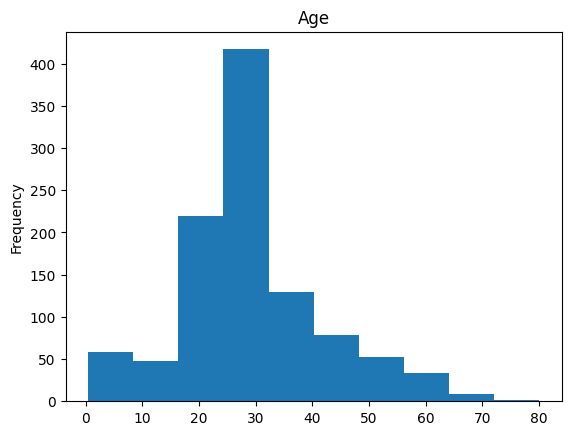

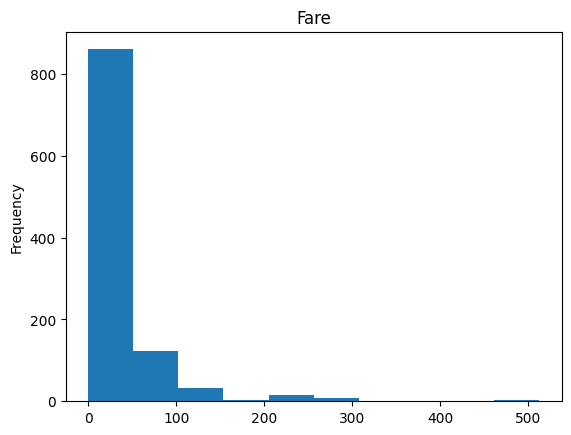

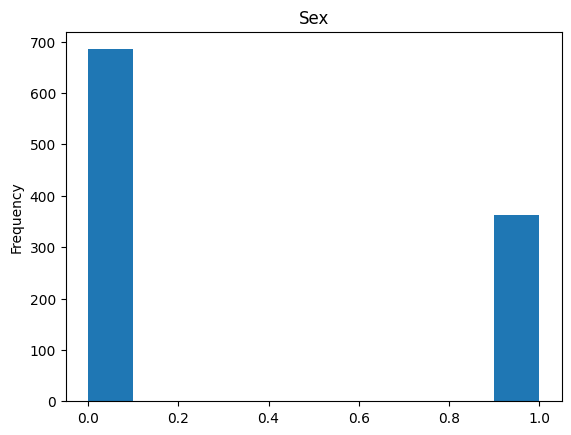

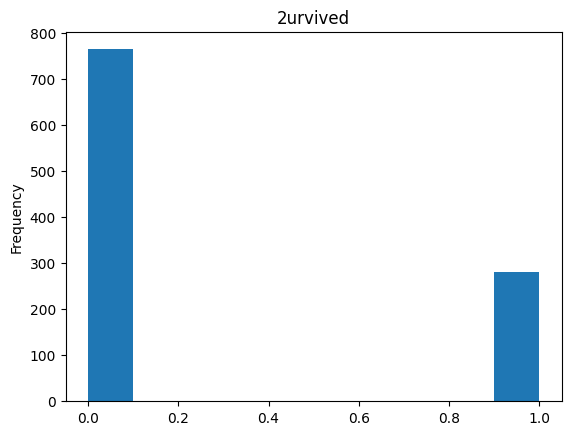

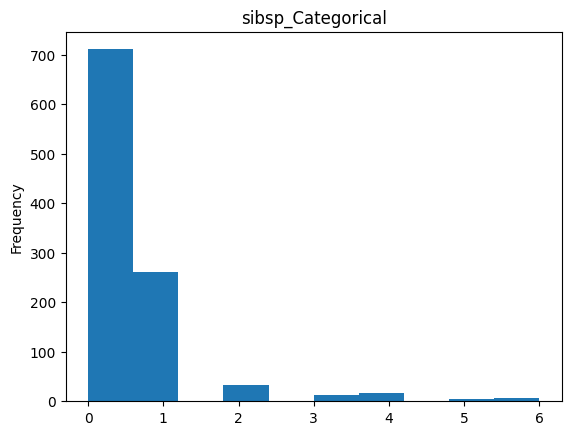

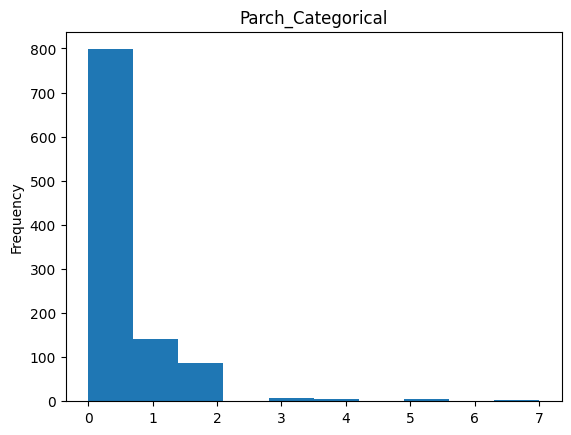

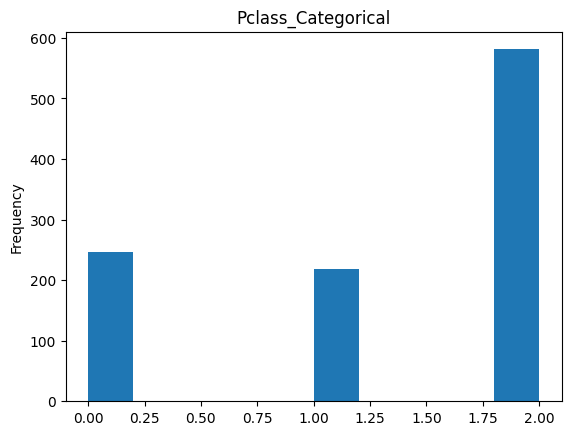

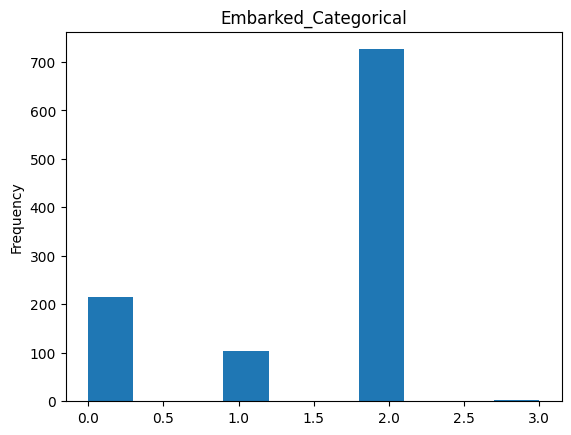

In [49]:
columnList = [columnName for columnName in tbl_train_clean.columns if '_' not in columnName or 'Categorical' in columnName]

for columnName in columnList:
  tbl_train_clean[columnName].plot(kind = 'hist', title = columnName)
  plt.show()

### Comments on histogram

[Age] => Looks right skewed. Seems to be many people of working age and a few old people, which seems right ?

[Fare] => Also right skewed. Seems to be a few cases of relatively large fares being paid

[Sex] => see descriptive statistics

[2urvived] => see descriptive statistics

[siblings] => Also right skewed. A few cases where people have many siblings

[parents/child] => Also right skewed. A few cases where people have many children (or parents ?)

[TicketClass] => Class 2 is the dominant class here.

[EmbarkedCategorical] Class 2 is the dominant class here.


### Correlation matrix

Using 'spearman' here as this is more resilient to outliers

,Age,Fare,Sex,2urvived,sibsp_Categorical,Parch_Categorical
Age,100.0,19.0,-5.0,-4.0,-8.0,-18.0
Fare,19.0,100.0,26.0,24.0,46.0,41.0
Sex,-5.0,26.0,100.0,45.0,19.0,23.0
2urvived,-4.0,24.0,45.0,100.0,9.0,12.0
sibsp_Categorical,-8.0,46.0,19.0,9.0,100.0,45.0
Parch_Categorical,-18.0,41.0,23.0,12.0,45.0,100.0


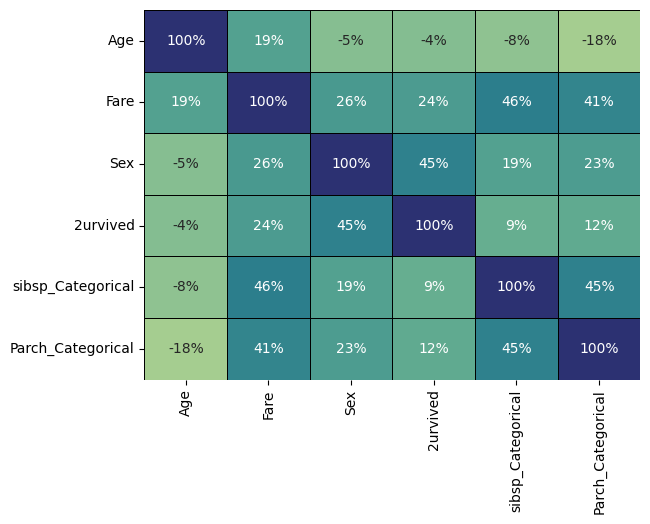

In [65]:
columnList = ['Age','Fare','Sex','2urvived','sibsp_Categorical','Parch_Categorical']
corrType = 'spearman'
display(tbl_train_clean[columnList].corr(corrType).round(2)*100)

print('='*200)

sns.heatmap(
    tbl_train_clean[columnList].corr(corrType)
    ,annot = True
    ,cmap='crest'
    ,fmt = '.0%'
    ,cbar=False
    ,linewidths=0.5
    ,linecolor='black'
)
plt.show()

* [Fare],[Sex] seem to have a reasonable monotonic relationship with [2urvived]

* There seems to be some moderate monotonic relationships between the variables. For example, [Fare] appears to be correlated with [sibsp] and [Parch]
